In [2]:
# Import nltk lib and packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Import std libs 
import csv
import numpy as np
import pandas as pd
from pandas import read_csv
from emoji import UNICODE_EMOJI
from googletrans import Translator
import time
import pickle
import os
from collections import Counter

# Import vader SWE and stanza for swe lemmatizing
from vaderSentiment_swe.vaderSentiment import SentimentIntensityAnalyzer as swe_sia
import stanza

# Import sklearn packages
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, recall_score, precision_score, f1_score, make_scorer, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# Import packages for plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from prettytable import PrettyTable

%matplotlib inline

# Toggle the NLTK downloader
#nltk.download()


In [2]:
# Remove stop words and stem the words (SWEDISH)

def remove_stop_words_and_lemmatize_words(text): 
    # Tokenize text to single words  
    words = tt.tokenize(text)
    # Remove special chars
    alpha_words = [w for w in words if remove_special_chars(w)]
    # Remove stopwords and create sentence with unlemmatized words
    words_without_stopwords= [word.lower() for word in alpha_words if word not in swe_stop_words]
    unlemmatized_sentence = ' '.join(words_without_stopwords)

    # Initiate document containing lemmatized words
    doc = nlp(unlemmatized_sentence)

    # Lemmatize words and join the words to a string
    lemmatizeds_words = [word.lemma for sentence in doc.sentences for word in sentence.words]

    lemmatized_sentence = ' '.join(lemmatizeds_words)
    lemmatized_sentence = lemmatized_sentence.replace('', '')
    return lemmatized_sentence


# Method for checking if word is a special character
def remove_special_chars(w):
    if w in UNICODE_EMOJI['en']:
        return True
    else:
        return w.isalpha()


# Initiate tweet tokenizer, sentiment analyzer and nlp pipeline for lemmatization
tt = TweetTokenizer()
analyzer = swe_sia()
nlp = stanza.Pipeline(lang="sv")

# Create list of stopwords
swe_stop_words=set(stopwords.words("swedish"))

# Read csv file and start processing data
df = pd.read_csv('.csv')
df['preprocessed_text'] = [remove_stop_words_and_lemmatize_words(text) for text in df['tweet_text']]
df['polarity_scores'] = [analyzer.polarity_scores(text) for text in df['preprocessed_text']]
df.to_csv('.csv')
print("Done.")


2021-05-31 09:39:24 INFO: Loading these models for language: sv (Swedish):
| Processor | Package   |
-------------------------
| tokenize  | talbanken |
| pos       | talbanken |
| lemma     | talbanken |
| depparse  | talbanken |

2021-05-31 09:39:24 INFO: Use device: cpu
2021-05-31 09:39:24 INFO: Loading: tokenize
2021-05-31 09:39:24 INFO: Loading: pos
2021-05-31 09:39:25 INFO: Loading: lemma
2021-05-31 09:39:26 INFO: Loading: depparse
2021-05-31 09:39:28 INFO: Done loading processors!
Done.


In [3]:
# Remove stop words and lemmatize the words (English)

def remove_stop_words_and_lemmatize_words(text): 
    # Tokenize text to single words  
    words = tt.tokenize(text)

    # Remove special chars
    alpha_words = [w for w in words if remove_special_chars(w)]

    # Remove stopwords and create sentence with unlemmatized words
    words_without_stopwords= [word.lower() for word in alpha_words if word not in stop_words]
    
    # Initiate document containing lemmatized words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words_without_stopwords]

    # Lemmatize words and join the words to a string
    lemmatized_sentence = ' '.join(lemmatized_words)
    lemmatized_sentence = lemmatized_sentence.replace('', '')
    return lemmatized_sentence


# Method for checking if word is a special character
def remove_special_chars(w):
    if w in UNICODE_EMOJI['en']:
        return True
    else:
        return w.isalpha()

# Start looping from index
index = 0

# Initiate tweet tokenizer, sentiment analyzer and translator
tt = TweetTokenizer()
sia = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
translator = Translator()

# Create list of stopwords
stop_words=set(stopwords.words("english"))

# Read csv file and start processing data
df = pd.read_csv('.csv')
df_to_translate = df.iloc[index:, :]
df_to_translate['english_text'] = [translator.translate(text, src='sv', dest='en').text for text in df_to_translate['tweet_text']]
df_to_translate['preprocessed_text'] = [remove_stop_words_and_lemmatize_words(text) for text in df_to_translate['english_text']]
df_to_translate['polarity_scores'] = [sia.polarity_scores(text) for text in df_to_translate['preprocessed_text']]
df_to_translate.to_csv('.csv')
print("Done.")



Done.


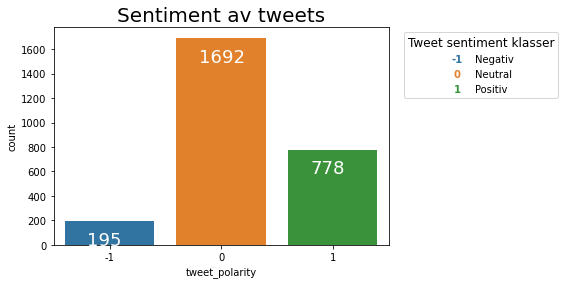

In [8]:
# Visualizing class imbalance of target values in data
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
 #Plot how many of each polarity exists
df = pd.read_csv('.csv')

# sns.countplot(x='tweet_polarity', data=df)

v

In [122]:
# Grid search CV for ML classifiers

# Initiate DF for swe and eng data
swe_df = pd.read_csv('.csv')
eng_df = pd.read_csv('.csv')
data_frames = {'ENG': eng_df, 'SWE': swe_df}

# LR pipeline setup
lr_pipe = Pipeline([
 ('lr', LogisticRegression())
])

# SVM pipeline setup
svm_pipe = Pipeline([
 ('svm',  SVC())
])

# Randomforest pipeline setup
rf_pipe = Pipeline([
 ('rf', RandomForestClassifier())
])

# dt pipeline setup
dt_pipe = Pipeline([
 ('dt', DecisionTreeClassifier())
])

# mnb pipeline setup
mnb_pipe = Pipeline([
 ('mnb', MultinomialNB())
])


# Parameters for classifiers
parameters_LR = {
    'lr__C': (0.001, 0.01, 0.1, 1, 10, 100),
    'lr__penalty': ('none', 'l1', 'l2', 'elasticnet'),
    'lr__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
}
            
parameters_SVM = {
    'svm__C': (0.001, 0.01, 0.1, 1, 10, 100),
    'svm__gamma': [1, 0.1, 0.001],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
            
parameters_RF = { 
    'rf__max_depth': [1000],
    'rf__max_features': (1,2,3,4,5,6,7,8,9,10),
    'rf__min_samples_split': [100],
    'rf__max_leaf_nodes': [None],
    'rf__n_estimators': (50, 100, 500)
    }

parameters_DT = {
    'dt__criterion': ('gini', 'entropy'),
    'dt__max_depth': (2,4,6,8,10,12)
    }

parameters_MNB = {
    'mnb__alpha': (0.01, 0.1, 0.5, 1.0, 10.0)
    }


tf_vectorizer = TfidfVectorizer(min_df = 1,max_df = 0.5,ngram_range=(1,2))
for key, df in data_frames.items():
    print("\nDataframe: ", key)
    X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'].values.astype('U'), df['tweet_polarity'], stratify=df['tweet_polarity'],random_state=42,test_size=0.3)
    
    # Setting up GridSearch for all alg
    lr_gs = GridSearchCV(lr_pipe, param_grid=parameters_LR, cv = 5, verbose = 1, n_jobs = -1)
    svm_gs = GridSearchCV(svm_pipe, param_grid=parameters_SVM, cv = 5, verbose = 1, n_jobs = -1)
    rf_gs = GridSearchCV(rf_pipe, param_grid=parameters_RF, cv = 5, verbose =1, n_jobs = -1)
    dt_gs = GridSearchCV(dt_pipe, param_grid=parameters_DT, cv = 3, verbose =1, n_jobs = -1)
    mnb_gs = GridSearchCV(mnb_pipe, param_grid=parameters_MNB, cv = 3, verbose = 1, n_jobs = -1)

    train_vectors = tf_vectorizer.fit_transform(X_train)
    test_vectors = tf_vectorizer.transform(X_test)

    oversample = SMOTE()
    X, y = oversample.fit_resample(train_vectors, y_train)

    # Fitting
    lr_gs.fit(X, y)
    svm_gs.fit(X, y)
    rf_gs.fit(X, y)
    dt_gs.fit(X, y)
    mnb_gs.fit(X, y)

    # Scoring
    lr_gs.score(test_vectors, y_test)
    print('\nBest Score - LR:', lr_gs.best_score_)
    print('Best params: ', lr_gs.best_params_ ) 

    svm_gs.score(test_vectors, y_test)
    print('\nBest Score - SVM:', svm_gs.best_score_)
    print('Best params: ', svm_gs.best_params_ ) 

    rf_gs.score(test_vectors, y_test)
    print('\nBest Score - RF:', rf_gs.best_score_)
    print('Best params: ', rf_gs.best_params_ ) 

    dt_gs.score(test_vectors, y_test)
    print('\nBest Score - DT:', dt_gs.best_score_)
    print('Best params: ', dt_gs.best_params_ ) 

    mnb_gs.score(test_vectors, y_test)
    print('\nBest Score - MNB:', mnb_gs.best_score_)
    print('Best params: ', mnb_gs.best_params_ ) 


   


Dataframe:  ENG
Fitting 5 folds for each of 120 candidates, totalling 600 fits
/Users/jonathangustafsson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.96005626 0.94599156        nan 0.95864979 0.9583685         nan
        nan 0.33333333        nan 0.33333333 0.8140647  0.8140647
 0.89113924 0.81490858 0.82559775        nan        nan        nan
        nan        nan 0.96005626 0.94599156        nan 0.95864979
 0.95893108        nan        nan 0.33333333        nan 0.33333333
 0.84050633 0.84050633 0.85738397 0.83966245 0.83938115        nan
        nan        nan        nan        nan 0.96005626 0.94599156
        nan 0.95583685 0.95921238        nan        nan 0.41884669
        nan 0.42081575 0.90576653 0.90576653 0.89620253 0.90604782
 0.90604782        nan        nan        nan        nan        nan
 0.96005626 0.94599156        nan 0.95639944 0.95893108        nan
        nan 0.819409

Class=1, n=622 (29.174%)
Class=-1, n=156 (7.317%)
Class=0, n=1354 (63.508%)
-------


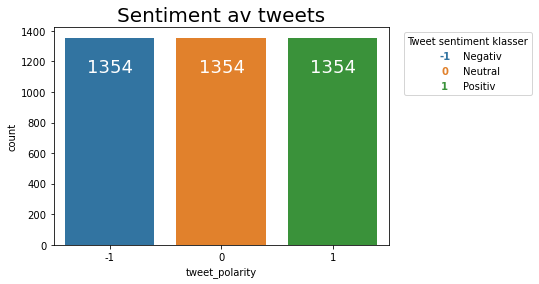

In [11]:
# Example of oversampling a multi-class classification dataset
df = pd.read_csv('.csv')

vectorizer = TfidfVectorizer(min_df = 0.0,max_df = 1.0,sublinear_tf = True,use_idf = True)

X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'].values.astype('U'), df['tweet_polarity'], stratify=df['tweet_polarity'], test_size=0.2)

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)  
y_label = LabelEncoder().fit_transform(y_train)
oversample = SMOTE()
X, y = oversample.fit_resample(train_vectors, y_train)

counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_label) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
print("-------")


ax = sns.countplot(x="tweet_polarity", data=pd.DataFrame(y))
ax.set_title('Sentiment av tweets', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', color='white', size=18)

handltext = ["-1", "0", "1"]
labels = ["Negativ", "Neutral", "Positiv"]


t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}, bbox_to_anchor= (1.03, 1), title="Tweet sentiment klasser") 

plt.show()

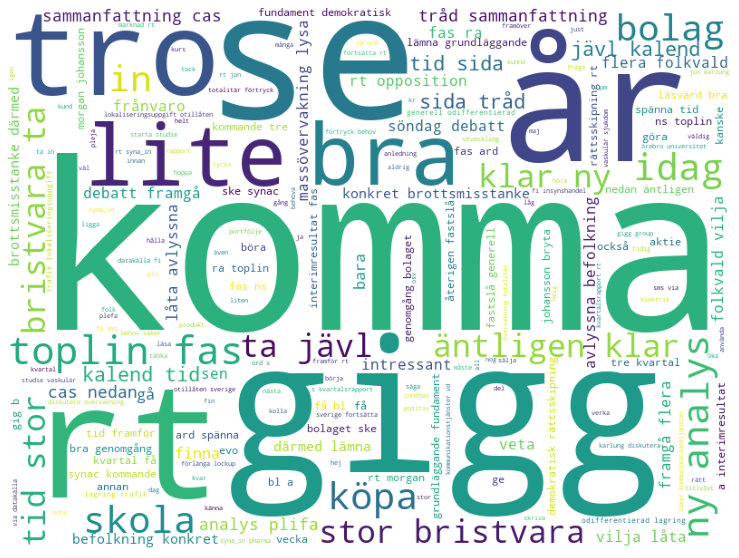

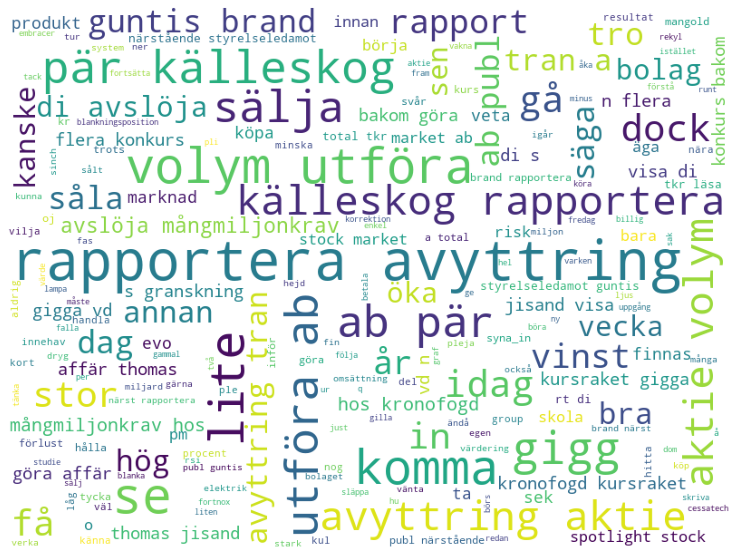

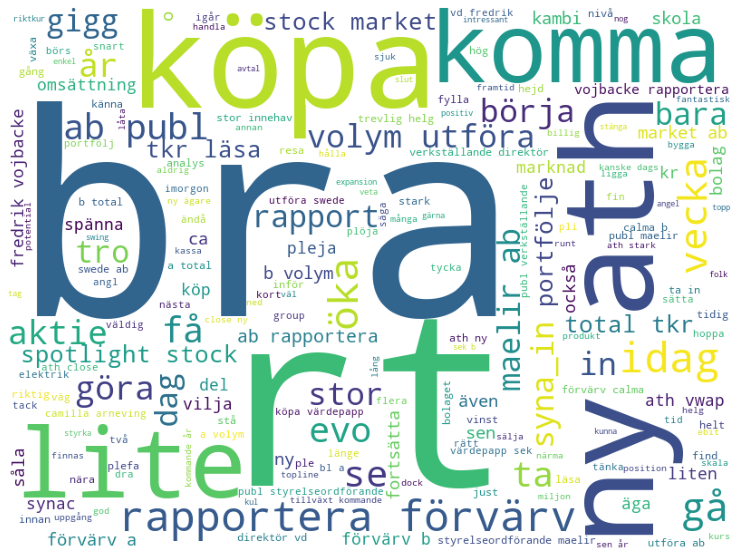

In [15]:
# Visualize frequency of words in data with wordclouds

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = eng_stop_words, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


eng_stop_words=['', ''] + list(stopwords.words("swedish"))
eng_df = pd.read_csv('.csv')
neutrals = eng_df[eng_df['tweet_polarity'] == 0]
negatives = eng_df[eng_df['tweet_polarity'] == -1]
positives = eng_df[eng_df['tweet_polarity'] == 1]

cloud(' '.join(neutrals['preprocessed_text'].values.astype('U')))
cloud(' '.join(negatives['preprocessed_text'].values.astype('U')))
cloud(' '.join(positives['preprocessed_text'].values.astype('U')))

In [16]:
# Visualize and calc accuracy score on SWE/ENG Lexicon methods

# Create dict from dict string SWE
def swe_string_to_dict(string): 
    # Remove score for each word in debug
    groups = string.split(',')
    polarity_scores_list_strings = ','.join(groups[:4]), ','.join(groups[4:])
    polarity_score = polarity_scores_list_strings[0] + "}"
    return dict((s.strip("{':"), float(v.strip("}"))) for s,v in (score.split() for score in polarity_score.split(",")))

# ENG
def eng_string_to_dict(string): 
    return dict((s.strip("{':"), float(v.strip("}"))) for s,v in (score.split() for score in string.split(",")))

# Start of script
swe_df = pd.read_csv('.csv')
eng_df = pd.read_csv('.csv')

# Drop potential rows with other targets than -1, 0, 1
swe_df.drop(swe_df[swe_df.tweet_polarity > 1].index, inplace=True)
eng_df.drop(eng_df[eng_df.tweet_polarity > 1].index, inplace=True)

data_frames = {'ENG': eng_df, 'SWE': swe_df}

swe_accuracy=[]
eng_accuracy=[]

# Accuracy scores for lexicon ENG/SWE
threshold = + 0.34

# Loop through dfs
for key, df in data_frames.items():
    pred = []
    real = [] 

    # Check if df is swe/eng
    string_to_dict_func = swe_string_to_dict if key == 'SWE' else eng_string_to_dict

    for index, tweet in df.iterrows():
        p_scores = string_to_dict_func(tweet['polarity_scores'])
        check = lambda x : 1 if x > threshold else ( -1 if x < -threshold else 0)
        pred.append(check(p_scores['compound']))
        real.append(tweet['tweet_polarity'])

    model_report = classification_report(real, pred)  
    print(model_report)

    acc = accuracy_score(real, pred)
    swe_accuracy.append(acc) if key == 'SWE' else eng_accuracy.append(acc)
    print(key)
    print('Accuracy: ',accuracy_score(real, pred))
    print("----------------------------------------")
    


              precision    recall  f1-score   support

          -1       0.11      0.09      0.10       194
           0       0.64      0.48      0.55      1693
           1       0.31      0.50      0.38       778

    accuracy                           0.46      2665
   macro avg       0.36      0.36      0.34      2665
weighted avg       0.51      0.46      0.47      2665

ENG
Accuracy:  0.4570356472795497
----------------------------------------
              precision    recall  f1-score   support

          -1       0.13      0.14      0.14       195
           0       0.65      0.51      0.57      1692
           1       0.33      0.48      0.39       778

    accuracy                           0.47      2665
   macro avg       0.37      0.38      0.37      2665
weighted avg       0.52      0.47      0.49      2665

SWE
Accuracy:  0.47317073170731705
----------------------------------------


In [ ]:
# Running models and plotting result (ML)

def __dict_help(scores_dict):
	scores_dict = {metric: round(np.mean(scores), 5) for metric, scores in scores_dict.items()}
	del scores_dict['fit_time']
	del scores_dict['score_time']
	acc = scores_dict['test_accuracy']
	swe_accuracy.append(acc) if key == 'SWE' else eng_accuracy.append(acc)
	for item in scores_dict:
		print(f'{item}: {scores_dict[item]}')

swe_df = pd.read_csv('.csv')
eng_df = pd.read_csv('.csv')
data_frames = {'ENG': eng_df, 'SWE': swe_df}

Classifier_names = [
'Lexikon baserad',
'Logistic Regression',
'Random Forest',
'Support Vector Machine',
'Decision Tree',
'Multinomial Naive Bayes'
]

# Accuracy scores for ML ENG/SWE
for key, df in data_frames.items():
	vectorizer = TfidfVectorizer(min_df = 1,max_df = 0.5,ngram_range=(1,2))

	if key == 'SWE':
		print('SWE')
		Classifiers = [
		RandomForestClassifier(n_estimators=50, max_features=4,max_depth=1000, max_leaf_nodes=None, min_samples_split=100),
		LogisticRegression(C=100,solver='newton-cg', penalty='l2'),
		SVC(kernel = 'poly', C=1, gamma=1),
		DecisionTreeClassifier(criterion='entropy', max_depth=12),
		MultinomialNB(alpha=0.01)]
	else:
		print('ENG')
		Classifiers = [
		RandomForestClassifier(n_estimators=500, max_features=1,max_depth=1000, max_leaf_nodes=None, min_samples_split=100),
		LogisticRegression(C=100,solver='newton-cg', penalty='l2'),
		SVC(kernel = 'poly', C=1, gamma=1),
		DecisionTreeClassifier(criterion='entropy', max_depth=12),
		MultinomialNB(alpha=0.01)]
		
	print(df.at[0,'preprocessed_text'])
	for clf in Classifiers:
		pipeline = imbpipeline([('vectorizer', vectorizer), ('smote', SMOTE()), ('classifier', clf)])
		skf = StratifiedKFold(n_splits=5, shuffle=True)

		scoring = {'accuracy': 'accuracy',
			'recall -1': make_scorer(recall_score, average='weighted', labels = [-1]),
			'recall 0': make_scorer(recall_score, average='weighted', labels = [0]),
			'recall 1': make_scorer(recall_score, average='weighted', labels = [1]),
			'precision -1': make_scorer(precision_score, average='weighted', labels = [-1]),
			'precision 0': make_scorer(precision_score, average='weighted', labels = [0]),
			'precision 1': make_scorer(precision_score, average='weighted', labels = [1]),
			'f1-score -1': make_scorer(f1_score, average='weighted', labels = [-1]),
			'f1-score 0': make_scorer(f1_score, average='weighted', labels = [0]),
			'f1-score 1': make_scorer(f1_score, average='weighted', labels = [1])}

		score = cross_validate(pipeline, df['preprocessed_text'].astype('U'), df['tweet_polarity'], scoring=scoring, cv=skf)
		print('\n'+clf.__class__.__name__)
		scores_dict = __dict_help(score)

#Print models result on DF
print(swe_accuracy)
print(eng_accuracy)
Index = [1,2,3,4,5,6]

plt.subplot(1, 2, 1)
plt.bar(Index,swe_accuracy, color='navy')
plt.xticks(Index, Classifier_names, rotation=90)
plt.ylabel('Accuracy på svenska tweets')
plt.ylim(0, 1)
plt.xlabel('Model')
for i, v in enumerate(swe_accuracy):
    plt.text(Index[i] - 0.4, v + 0.01, str(round(v, 2)), fontsize='small')

# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.bar(Index,eng_accuracy, color = 'skyblue')
plt.xticks(Index, Classifier_names, rotation=90)
plt.ylabel('Accuracy på engelska tweets')
plt.ylim(0, 1)
plt.xlabel('Model')
for i, v in enumerate(eng_accuracy):
    plt.text(Index[i] - 0.4, v + 0.01, str(round(v, 2)), fontsize='small')
plt.tight_layout()
plt.show()